In [12]:
import pandas as pd

# Load the data
covid_data = pd.read_csv('./Covid19.csv')

# Display the first few rows to understand the structure
print(covid_data.head())


             State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
0  Andaman and Nicobar        10766       0       10637     129           0.0   
1       Andhra Pradesh      2340676       0     2325943   14733           0.0   
2    Arunachal Pradesh        67049       0       66753     296           0.0   
3                Assam       746159       5      738119    8035           0.0   
4                Bihar       855267       1      842952   12314           0.0   

   Discharge Ratio  Death Ratio  Population  
0            98.80         1.20   100896618  
1            99.37         0.63   128500364  
2            99.56         0.44      658019  
3            98.92         1.08      290492  
4            98.56         1.44    40100376  


In [13]:
print(covid_data.columns)
print(covid_data.info())


Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB
None


In [14]:
covid_data.columns = covid_data.columns.str.strip()


In [15]:
print(covid_data.isnull().sum())
covid_data.fillna(0, inplace=True)


State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64


In [16]:
covid_data['Total Cases'] = pd.to_numeric(covid_data['Total Cases'], errors='coerce')
covid_data['Active'] = pd.to_numeric(covid_data['Active'], errors='coerce')
covid_data['Discharged'] = pd.to_numeric(covid_data['Discharged'], errors='coerce')
covid_data['Deaths'] = pd.to_numeric(covid_data['Deaths'], errors='coerce')
covid_data['Active Ratio'] = pd.to_numeric(covid_data['Active Ratio'], errors='coerce')


In [17]:
total_cases = covid_data.sort_values(by='Total Cases', ascending=False)
print(total_cases[['State/UTs', 'Total Cases']])


                                   State/UTs  Total Cases
20                               Maharashtra      8171048
16                                    Kerala      6907241
15                                 Karnataka      4088769
30                                Tamil Nadu      3610655
1                             Andhra Pradesh      2340676
33                             Uttar Pradesh      2145431
35                               West Bengal      2126282
8                                      Delhi      2040910
25                                    Odisha      1348409
28                                 Rajasthan      1326465
10                                   Gujarat      1291383
6                               Chhattisgarh      1187695
11                                   Haryana      1078903
19                            Madhya Pradesh      1056351
4                                      Bihar       855267
31                                 Telengana       844432
27            

In [18]:
covid_data['Recovery Rate'] = covid_data['Discharged'] / covid_data['Total Cases']
covid_data['Mortality Rate'] = covid_data['Deaths'] / covid_data['Total Cases']
print(covid_data[['State/UTs', 'Recovery Rate', 'Mortality Rate']])


                                   State/UTs  Recovery Rate  Mortality Rate
0                        Andaman and Nicobar       0.988018        0.011982
1                             Andhra Pradesh       0.993706        0.006294
2                          Arunachal Pradesh       0.995585        0.004415
3                                      Assam       0.989225        0.010768
4                                      Bihar       0.985601        0.014398
5                                 Chandigarh       0.988232        0.011768
6                               Chhattisgarh       0.988052        0.011948
7   Dadra and Nagar Haveli and Daman and Diu       0.999655        0.000345
8                                      Delhi       0.986927        0.013066
9                                        Goa       0.984746        0.015242
10                                   Gujarat       0.991417        0.008579
11                                   Haryana       0.990007        0.009968
12          

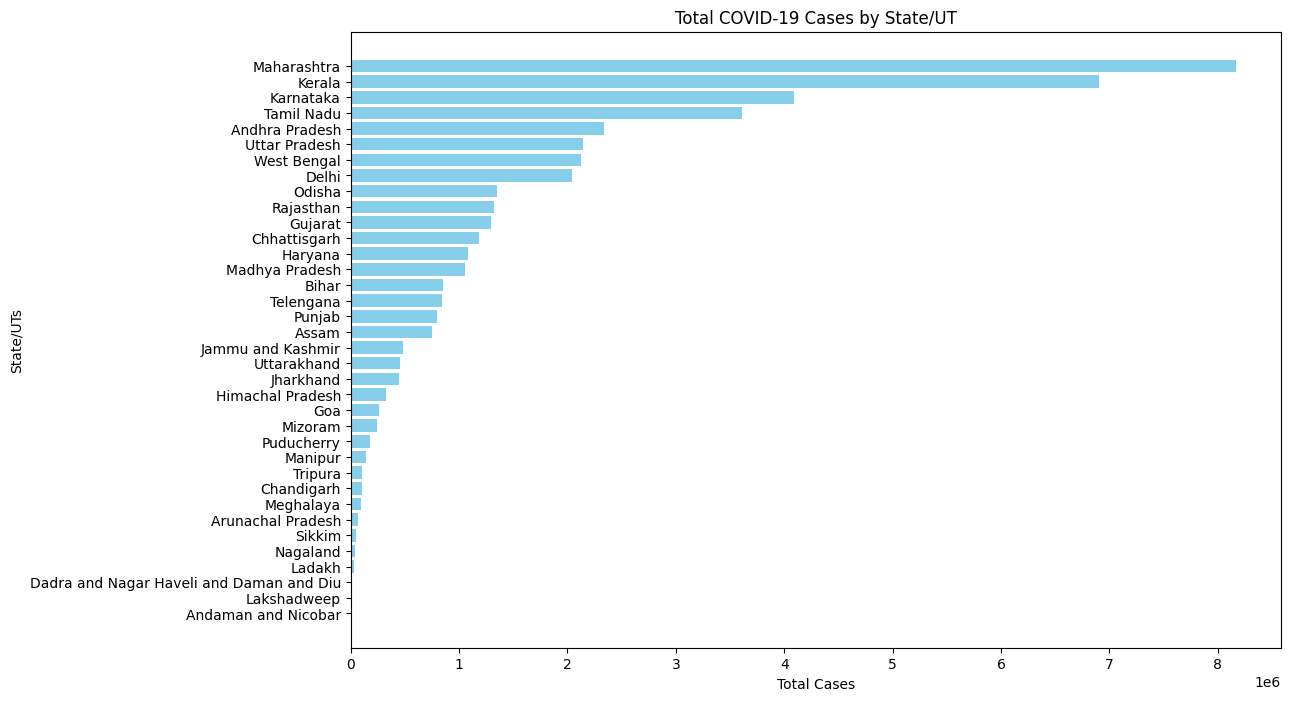

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(total_cases['State/UTs'], total_cases['Total Cases'], color='skyblue')
plt.xlabel('Total Cases')
plt.ylabel('State/UTs')
plt.title('Total COVID-19 Cases by State/UT')
plt.gca().invert_yaxis()  # Reverse the order to show the state with the highest cases at the top
plt.show()


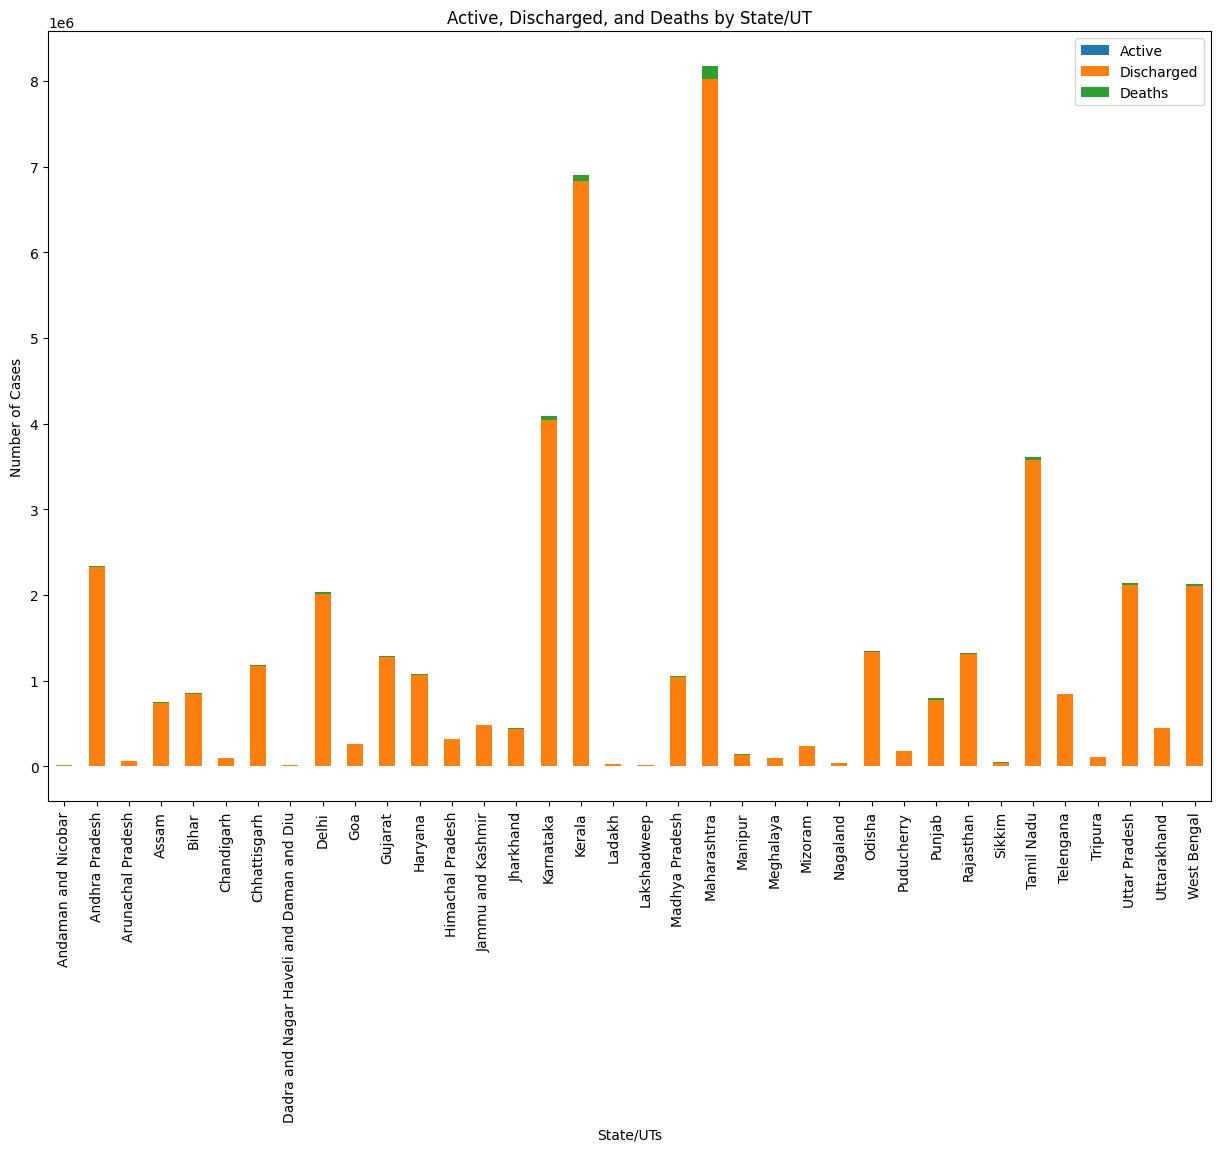

In [24]:
covid_data.set_index('State/UTs')[['Active', 'Discharged', 'Deaths']].plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Active, Discharged, and Deaths by State/UT')
plt.xlabel('State/UTs')
plt.ylabel('Number of Cases')
plt.show()


In [25]:
top_active = covid_data.sort_values(by='Active', ascending=False).head(10)
print(top_active[['State/UTs', 'Active']])


        State/UTs  Active
27         Punjab    1233
20    Maharashtra     214
35    West Bengal     135
25         Odisha      59
33  Uttar Pradesh      57
11        Haryana      27
16         Kerala      18
8           Delhi      14
15      Karnataka      12
31      Telengana       8


In [22]:
correlation_matrix = covid_data[['Total Cases', 'Active', 'Discharged', 'Deaths']].corr()
print(correlation_matrix)


             Total Cases    Active  Discharged    Deaths
Total Cases     1.000000  0.091469    0.999988  0.944591
Active          0.091469  1.000000    0.089881  0.184970
Discharged      0.999988  0.089881    1.000000  0.942957
Deaths          0.944591  0.184970    0.942957  1.000000
